In [1]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('ggplot')

In [90]:
dim = 3
nump = 1000
nums = 1024
dt = .05

zeta = 1.0
m = 1.0
kBT = 1.0
std = np.sqrt(2*kBT*zeta*dt) #eqn F11

zeta1 = 1
m1 = .1
kBT1 = .1
std1 = np.sqrt(2*kBT1*zeta1*dt) #eqn F11

zeta2 = .20
m2 = 1.0
kBT2 = 1.0
std2 = np.sqrt(2*kBT2*zeta2*dt) #eqn F11

In [91]:
R = np.zeros([nump, dim])
V = np.zeros([nump, dim])
W = np.zeros([nump, dim])
Rs = np.zeros([nums, nump, dim])
Vs = np.zeros([nums, nump, dim])
Ws = np.zeros([nums, nump, dim])

R1 = np.zeros([nump, dim])
V1 = np.zeros([nump, dim])
W1 = np.zeros([nump, dim])
Rs1 = np.zeros([nums, nump, dim])
Vs1 = np.zeros([nums, nump, dim])
Ws1 = np.zeros([nums, nump, dim])

R2 = np.zeros([nump, dim])
V2 = np.zeros([nump, dim])
W2 = np.zeros([nump, dim])
Rs2 = np.zeros([nums, nump, dim])
Vs2 = np.zeros([nums, nump, dim])
Ws2 = np.zeros([nums, nump, dim])

time = np.zeros([nums])

In [92]:
np.random.seed(0)

for i in range(nums):
    W = std * np.random.randn(nump, dim)
    V = V * (1 - zeta/m*dt) + W/m # eqn F9
    R = R + V*dt # update position eqn F5
    Rs[i]=R 
    Vs[i]=V 
    Ws[i]=W 
    
    W1 = std1 * np.random.randn(nump, dim)
    V1 = V1 * (1 - zeta1/m1*dt) + W1/m1 # eqn F9
    R1 = R1 + V1*dt # update position eqn F5
    Rs1[i]=R1 
    Vs1[i]=V1 
    Ws1[i]=W1 
    
    W2 = std2 * np.random.randn(nump, dim)
    V2 = V2 * (1 - zeta2/m2*dt) + W2/m2 # eqn F9
    R2 = R2 + V2*dt # update position eqn F5
    Rs2[i]=R2 
    Vs2[i]=V2
    Ws2[i]=W2 
    
    time[i]=i*dt 

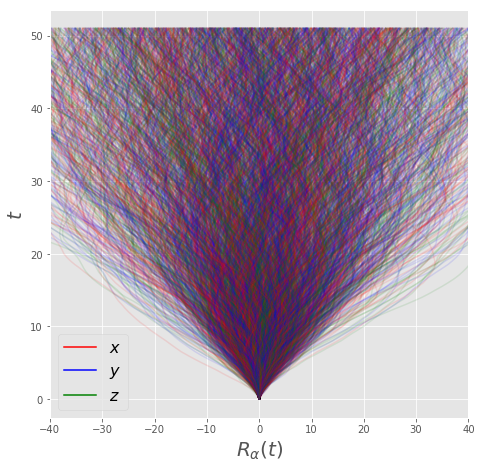

In [40]:
# postition R versus time for all particles

fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_xlabel(r'$R_{\alpha}(t)$', fontsize = 20)
ax.set_ylabel(r'$t$', fontsize = 20)
ax.set_xlim(-40, 40)

ts = 10 #only draw every 10 points
for n in range(nump):
    lx, = ax.plot(Rs[::ts,n,0], time[::ts], 'r', alpha=0.1)
    ly, = ax.plot(Rs[::ts,n,1], time[::ts], 'b', alpha=0.1)
    lz, = ax.plot(Rs[::ts,n,2], time[::ts], 'g', alpha=0.1)

leg = ax.legend([lx, ly, lz], [r"$x$", r"$y$", r"$z$"], loc=0, fontsize=16)
for l in leg.get_lines():
    l.set_alpha(1)

plt.show()

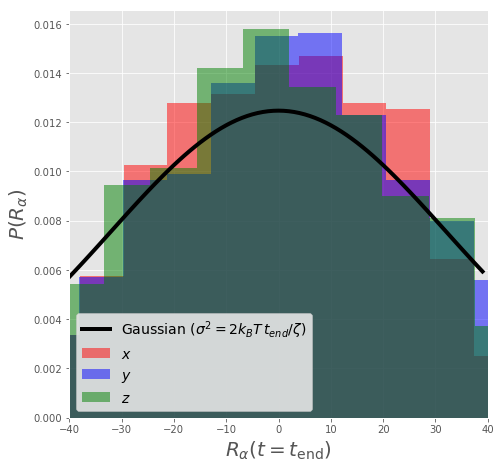

In [41]:
#position distribution of particles at end of simulation

fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_xlabel(r'$R_{\alpha}(t=t_\mathrm{end})$', fontsize = 20)
ax.set_ylabel(r'$P(R_{\alpha})$', fontsize = 20)

ax.hist(Rs[-1,:,0], bins=20, normed=True, color='r', alpha=.5, lw=0, label=r"$x$")
ax.hist(Rs[-1,:,1], bins=20, normed=True, color='b', alpha=.5, lw=0, label=r"$y$")
ax.hist(Rs[-1,:,2], bins=20, normed=True, color='g', alpha=.5, lw=0, label=r"$z$")

sig2=2*kBT/zeta*dt*nums
ave=0.0

x = np.arange(-40,40,1)
y = np.exp(-(x-ave)**2/2/sig2)/np.sqrt(2*np.pi*sig2)

ax.plot(x,y,lw=4,color='k',label=r"Gaussian $(\sigma^2=2k_BT\,t_{end}/\zeta)$")
ax.legend(fontsize=14,loc=3, framealpha=0.9)
ax.set_xlim(-40,40)

plt.show()

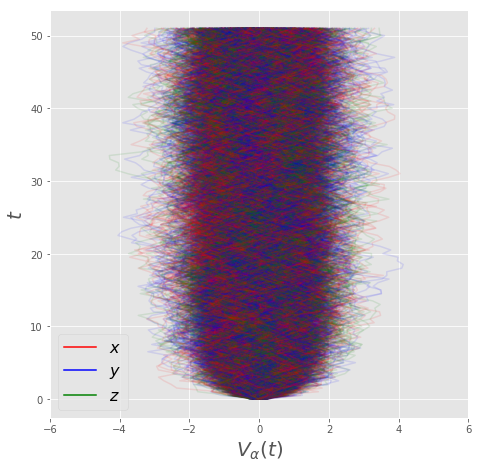

In [42]:
# Velocity versus time for all particles

fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_xlabel(r'$V_{\alpha}(t)$', fontsize = 20)
ax.set_ylabel(r'$t$', fontsize = 20)
ax.set_xlim(-6, 6)

ts = 10 #only draw every 10 points
for n in range(nump):
    lx, = ax.plot(Vs[::ts,n,0], time[::ts], 'r', alpha=0.1)
    ly, = ax.plot(Vs[::ts,n,1], time[::ts], 'b', alpha=0.1)
    lz, = ax.plot(Vs[::ts,n,2], time[::ts], 'g', alpha=0.1)

leg = ax.legend([lx, ly, lz], [r"$x$", r"$y$", r"$z$"], loc=0, fontsize=16)
for l in leg.get_lines():
    l.set_alpha(1)

plt.show()

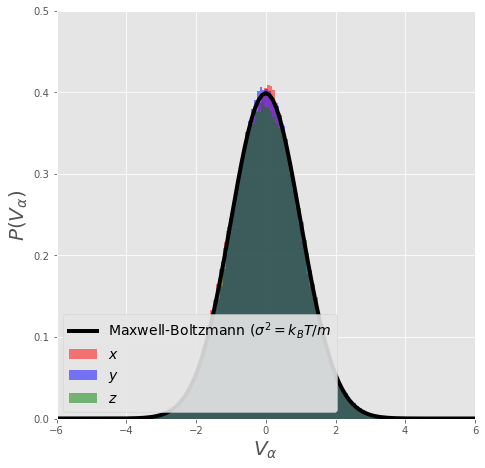

In [43]:
#velocity distribution of particles at end of simulation

fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_xlabel(r'$V_{\alpha}$', fontsize = 20)
ax.set_ylabel(r'$P(V_{\alpha})$', fontsize = 20)

tophalf = nums//2
ax.hist(Vs[tophalf:,:,0].flatten(), bins=100, normed=True, color='r', alpha=.5, lw=0, label=r"$x$")
ax.hist(Vs[tophalf:,:,1].flatten(), bins=100, normed=True, color='b', alpha=.5, lw=0, label=r"$y$")
ax.hist(Vs[tophalf:,:,2].flatten(), bins=100, normed=True, color='g', alpha=.5, lw=0, label=r"$z$")

sig2=kBT/m
ave=0.0

x = np.arange(-10,10,.1)
y = np.exp(-(x-ave)**2/2/sig2)/np.sqrt(2*np.pi*sig2)

ax.plot(x,y,lw=4,color='k',label=r"Maxwell-Boltzmann $(\sigma^2=k_BT/m$")
ax.legend(fontsize=14, loc=3, framealpha=0.9)
ax.set_xlim(-6, 6)
ax.set_ylim(0, .5)

plt.show()

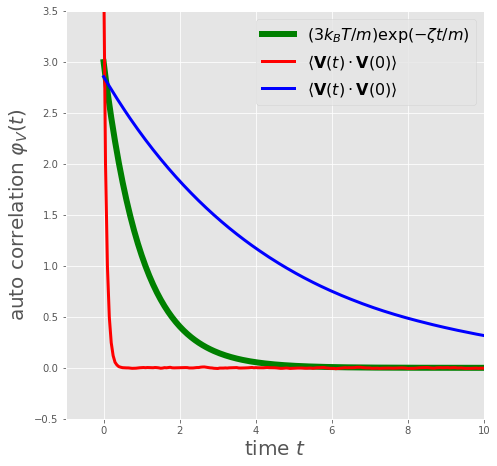

In [93]:
def auto_correlate(v):
    corr = np.correlate(v, v, mode="full")
    return corr[len(v) - 1:]/len(v) #take positive values and normalize

corr = np.zeros([nums])
corr1 = np.zeros([nums])
corr2 = np.zeros([nums])

for n in range(nump):
    for d in range(dim):
        corr = corr + auto_correlate(Vs[:,n,d])
        corr1 = corr1 + auto_correlate(Vs1[:,n,d])
        corr2 = corr2 + auto_correlate(Vs2[:,n,d])

corr = corr/nump #avg over all particles
corr1 = corr1/nump #avg over all particles
corr2 = corr2/nump #avg over all particles

fig, ax = plt.subplots(figsize=(7.5,7.5))

ax.plot(time,dim*kBT/m*np.exp(-zeta/m*time),'g',lw=6, label=r'$(3k_BT/m)\exp(-\zeta t/m)$')
#ax.plot(time,corr, 'g',lw=3,label=r'$\langle\mathbf{V}(t)\cdot \mathbf{V}(0)\rangle$')
ax.plot(time,corr1,'r',lw=3,label=r'$\langle\mathbf{V}(t)\cdot \mathbf{V}(0)\rangle$')
ax.plot(time,corr2,'b',lw=3,label=r'$\langle\mathbf{V}(t)\cdot \mathbf{V}(0)\rangle$')

ax.set_xlabel(r"time $t$", fontsize=20)
ax.set_ylabel(r"auto correlation $\varphi_V(t)$", fontsize=20)
ax.set_xlim(-1,10)
ax.set_ylim(-0.5,3.5)
ax.legend(fontsize=16)

plt.show()

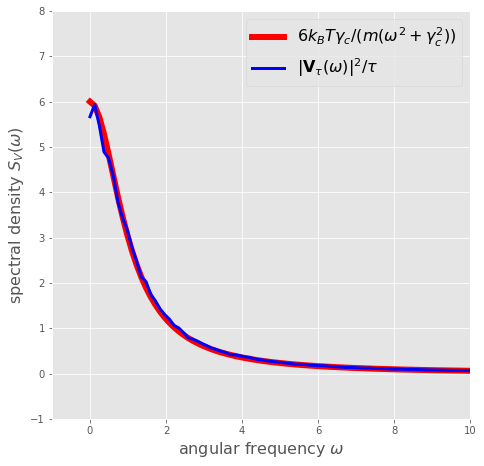

In [27]:
# return power spectrum for positive frequencies of even signal v
from numpy import fft

def psd(v,dt):  
    vw = fft.fft(v)*dt # V(w) with zero-frequency component at vw(0)
    return np.abs(vw[:nums//2])**2/(nums*dt) # S_V for w > 0 eqn G9

Sw   = np.zeros([nums//2])

for n in range(nump):
    for d in range(dim):
        Sw = Sw + psd(Vs[:,n,d],dt) # power spectrum of d-component of velocity for particle n

Sw = Sw/nump

fig, ax = plt.subplots(figsize=(7.5,7.5))

gamma = zeta/m
omega = fft.fftfreq(nums,d=dt)[:nums//2]*2.0*np.pi

ax.plot(omega,(6.0*kBT/m)*gamma/(omega**2 + gamma**2),'r',lw=6,label=r'$6k_BT\gamma_c/(m(\omega^2+\gamma_c^2))$')                         
ax.plot(omega,Sw,'b',lw=3,label=r'$|\mathbf{V}_\tau(\omega)|^2 / \tau$')

ax.set_xlabel(r"angular frequency $\omega$", fontsize=16)
ax.set_ylabel(r"spectral density $S_V(\omega)$", fontsize=16)
ax.legend(fontsize=16)
plt.xlim(-1, 10)
plt.ylim(-1, 8)

plt.show()

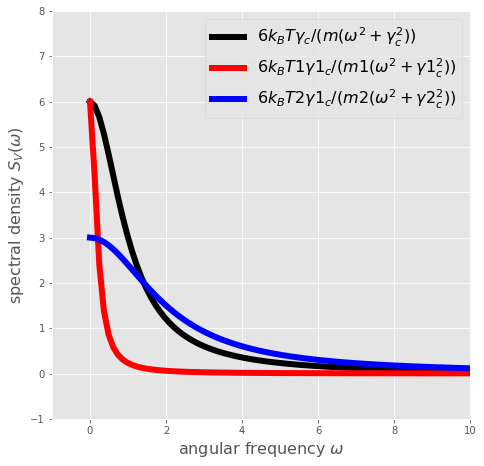

In [101]:
fig, ax = plt.subplots(figsize=(7.5,7.5))

m1 = 5
zeta1 = 1
kBT1 = 1

m2 = 1
zeta2 = 2
kBT2 = 1

gamma = zeta/m
gamma1 = zeta1/m1
gamma2 = zeta2/m2

omega = fft.fftfreq(nums,d=dt)[:nums//2]*2.0*np.pi

ax.plot(omega,(6.0*kBT/m)*gamma/(omega**2 + gamma**2),'black',lw=6,label=r'$6k_BT\gamma_c/(m(\omega^2+\gamma_c^2))$')                         
ax.plot(omega,(6.0*kBT1/m1)*gamma1/(omega**2 + gamma1**2),'r',lw=6,label=r'$6k_BT1\gamma1_c/(m1(\omega^2+\gamma1_c^2))$')                         
ax.plot(omega,(6.0*kBT2/m2)*gamma2/(omega**2 + gamma2**2),'b',lw=6,label=r'$6k_BT2\gamma1_c/(m2(\omega^2+\gamma2_c^2))$')                         

ax.set_xlabel(r"angular frequency $\omega$", fontsize=16)
ax.set_ylabel(r"spectral density $S_V(\omega)$", fontsize=16)
ax.legend(fontsize=16)
plt.xlim(-1, 10)
plt.ylim(-1, 8)

plt.show()